In [12]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


with open('hamlet.txt', 'r') as file:
    text = file.read().lower()

# Tokenization - creating indxes for word
tokenizer = Tokenizer(num_words=2000, oov_token="<OOV>")
tokenizer.fit_on_texts([text])
total_words = min(2000, len(tokenizer.word_index) + 1)
total_words

2000

In [13]:
tokenizer.word_index

{'<OOV>': 1,
 'the': 2,
 'and': 3,
 'to': 4,
 'of': 5,
 'i': 6,
 'you': 7,
 'a': 8,
 'my': 9,
 'it': 10,
 'in': 11,
 'that': 12,
 'ham': 13,
 'is': 14,
 'not': 15,
 'his': 16,
 'this': 17,
 'with': 18,
 'your': 19,
 'but': 20,
 'for': 21,
 'me': 22,
 'lord': 23,
 'as': 24,
 'what': 25,
 'he': 26,
 'be': 27,
 'so': 28,
 'him': 29,
 'haue': 30,
 'king': 31,
 'will': 32,
 'no': 33,
 'our': 34,
 'we': 35,
 'on': 36,
 'are': 37,
 'if': 38,
 'all': 39,
 'then': 40,
 'shall': 41,
 'by': 42,
 'thou': 43,
 'come': 44,
 'or': 45,
 'hamlet': 46,
 'good': 47,
 'do': 48,
 'hor': 49,
 'her': 50,
 'let': 51,
 'now': 52,
 'thy': 53,
 'how': 54,
 'more': 55,
 'they': 56,
 'from': 57,
 'enter': 58,
 'at': 59,
 'was': 60,
 'oh': 61,
 'like': 62,
 'most': 63,
 'there': 64,
 'well': 65,
 'know': 66,
 'selfe': 67,
 'would': 68,
 'them': 69,
 'loue': 70,
 'may': 71,
 "'tis": 72,
 'vs': 73,
 'sir': 74,
 'qu': 75,
 'which': 76,
 'did': 77,
 'why': 78,
 'laer': 79,
 'giue': 80,
 'thee': 81,
 'ile': 82,
 'must':

In [14]:
# Generate input sequences
input_sequences = []
for line in text.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_seq = token_list[:i+1]
        input_sequences.append(n_gram_seq)

In [6]:
input_sequences

[[2, 688],
 [2, 688, 5],
 [2, 688, 5, 46],
 [2, 688, 5, 46, 42],
 [2, 688, 5, 46, 42, 1887],
 [2, 688, 5, 46, 42, 1887, 1888],
 [2, 688, 5, 46, 42, 1887, 1888, 1889],
 [1181, 1890],
 [1181, 1890, 1891],
 [1181, 1890, 1891, 1892],
 [58, 408],
 [58, 408, 3],
 [58, 408, 3, 1182],
 [58, 408, 3, 1182, 178],
 [58, 408, 3, 1182, 178, 1893],
 [408, 1183],
 [408, 1183, 64],
 [409, 163],
 [409, 163, 378],
 [409, 163, 378, 22],
 [409, 163, 378, 22, 248],
 [409, 163, 378, 22, 248, 883],
 [19, 67],
 [452, 225],
 [452, 225, 249],
 [452, 225, 249, 2],
 [452, 225, 249, 2, 31],
 [409, 408],
 [452, 26],
 [409, 7],
 [409, 7, 44],
 [409, 7, 44, 63],
 [409, 7, 44, 63, 1894],
 [409, 7, 44, 63, 1894, 97],
 [409, 7, 44, 63, 1894, 97, 19],
 [409, 7, 44, 63, 1894, 97, 19, 567],
 [452, 72],
 [452, 72, 52],
 [452, 72, 52, 1895],
 [452, 72, 52, 1895, 568],
 [452, 72, 52, 1895, 568, 379],
 [452, 72, 52, 1895, 568, 379, 81],
 [452, 72, 52, 1895, 568, 379, 81, 4],
 [452, 72, 52, 1895, 568, 379, 81, 4, 274],
 [452, 72

In [15]:
# Padding sequences to ensure uniform input size
max_sequence_length = max(len(seq) for seq in input_sequences)
max_sequence_length

14

In [16]:
input_sequences = np.array(pad_sequences(input_sequences,maxlen=max_sequence_length, padding='pre'))
input_sequences

array([[   0,    0,    0, ...,    0,    2,  688],
       [   0,    0,    0, ...,    2,  688,    5],
       [   0,    0,    0, ...,  688,    5,   46],
       ...,
       [   0,    0,    0, ...,    5,   46, 1048],
       [   0,    0,    0, ...,   46, 1048,    5],
       [   0,    0,    0, ..., 1048,    5,  194]], dtype=int32)

In [17]:
# Split into input (X) and target (y) without one-hot
x = input_sequences[:, :-1]
y = input_sequences[:, -1]  # Keep as integer labels

# Split dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=100, input_shape=(x.shape[1],)))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(64))
model.add(Dense(total_words, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 13, 100)        │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 13, 128)        │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 13, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2000)           │       130,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 496,656 (1.89 MB)

 Trainable params: 496,656 (1.89 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    x_train, y_train,
    epochs=100,
    validation_data=(x_test, y_test),
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.1001 - loss: 6.2099 - val_accuracy: 0.0973 - val_loss: 5.8579
Epoch 2/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.1028 - loss: 5.7050 - val_accuracy: 0.0973 - val_loss: 5.7688
Epoch 3/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.1064 - loss: 5.5451 - val_accuracy: 0.0999 - val_loss: 5.7188
Epoch 4/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.1126 - loss: 5.4391 - val_accuracy: 0.1024 - val_loss: 5.6968
Epoch 5/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.1139 - loss: 5.3838 - val_accuracy: 0.1076 - val_loss: 5.6622
Epoch 6/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.1217 - loss: 5.2599 - val_accuracy: 0.1096 - val_loss: 5.6514
Epoch 7/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.1261 - loss: 5.2041 - val_accuracy: 0.1131 - val_loss: 5.6540
Epoch 8/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.1313 - loss: 5.0919 - 

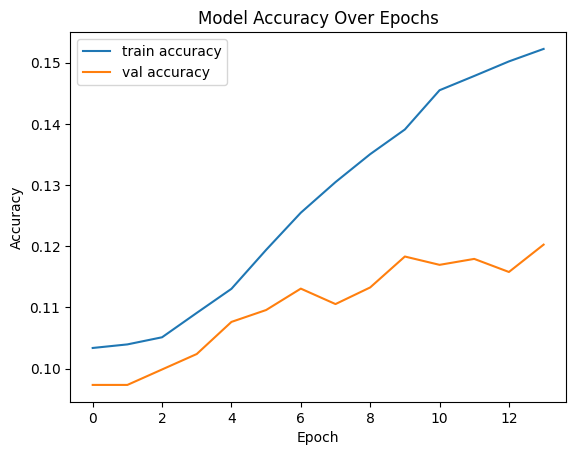

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs')
plt.show()


In [21]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

def predict_next_word(model, tokenizer, text_input, max_sequence_len):
    # Step 1: Tokenize the input text
    token_list = tokenizer.texts_to_sequences([text_input])[0]

    # Step 2: Pad the input sequence to max_sequence_len - 1
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')

    # Step 3: Predict probabilities for the next word
    predicted_probs = model.predict(token_list, verbose=0)

    # Step 4: Get the index of the highest probability
    predicted_index = np.argmax(predicted_probs, axis=-1)[0]

    # Step 5: Map index back to word
    for word, index in tokenizer.word_index.items():
        if index == predicted_index:
            return word

    return ""


In [23]:
input_text = "My name"
next_word = predict_next_word(model, tokenizer, input_text, max_sequence_length)
print(f"Next word might be: {next_word}")

Next word might be: of
